In [17]:
%matplotlib inline

In [18]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('./dataset/weatherHistory.csv')

In [20]:
df

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,0.89,14.1197,251,15.8263,0,1015.13
1,9.355556,0.86,14.2646,259,15.8263,0,1015.63
2,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,8.288889,0.83,14.1036,269,15.8263,0,1016.41
4,8.755556,0.83,11.0446,259,15.8263,0,1016.51
...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31,16.1000,0,1014.36
96449,24.583333,0.48,10.0947,20,15.5526,0,1015.16
96450,22.038889,0.56,8.9838,30,16.1000,0,1015.66
96451,21.522222,0.60,10.5294,20,16.1000,0,1015.95


In [21]:
x = df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']]
y = df['Temperature (C)']

x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.float32).reshape(-1, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [23]:
steps = [
    ('scaling', StandardScaler()),
    ('polynomial', PolynomialFeatures()),
    ('ridge', Ridge()),
]

parameters = {
    'ridge__alpha': [0.6,0.7,0.8,0.9,1],
    'polynomial__degree': [2,3,4]
}

In [24]:
pipe = Pipeline(steps)
model = GridSearchCV(pipe, parameters, cv=5)
# model = RandomizedSearchCV(pipe, parameters, cv=5)
model.fit(X_train, y_train)

c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.21636e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.61546e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.85398e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.72349e-09): result may not be accurate.
  return linalg.solve(A

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('polynomial', PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomial__degree': [2, 3, 4],
                         'ridge__alpha': [0.6, 0.7, 0.8, 0.9, 1]})

In [25]:
model.cv_results_

{'mean_fit_time': array([0.06582241, 0.03790016, 0.06204743, 0.07775702, 0.03431492,
        0.09873109, 0.07737579, 0.08118224, 0.07492199, 0.07139602,
        1.27981262, 1.1315423 , 1.00386176, 0.80107193, 0.69433355]),
 'std_fit_time': array([0.01880889, 0.0135712 , 0.00211562, 0.02760694, 0.00478184,
        0.02866887, 0.01058664, 0.01264708, 0.00859469, 0.00420134,
        0.11716253, 0.13401109, 0.19576267, 0.160899  , 0.01426105]),
 'mean_score_time': array([0.01097312, 0.00639653, 0.00878406, 0.00997515, 0.00418434,
        0.01475372, 0.00749779, 0.01065354, 0.00902038, 0.00773849,
        0.03232098, 0.02014427, 0.02732811, 0.01635976, 0.01495938]),
 'std_score_time': array([0.00810217, 0.00317278, 0.0013547 , 0.00437104, 0.00073762,
        0.00619341, 0.0006247 , 0.00435048, 0.00223112, 0.00105298,
        0.01222607, 0.0082583 , 0.01164059, 0.00286465, 0.00062985]),
 'param_polynomial__degree': masked_array(data=[2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4],
            

In [26]:
model.score(X_test, y_test)

0.6191602106303754

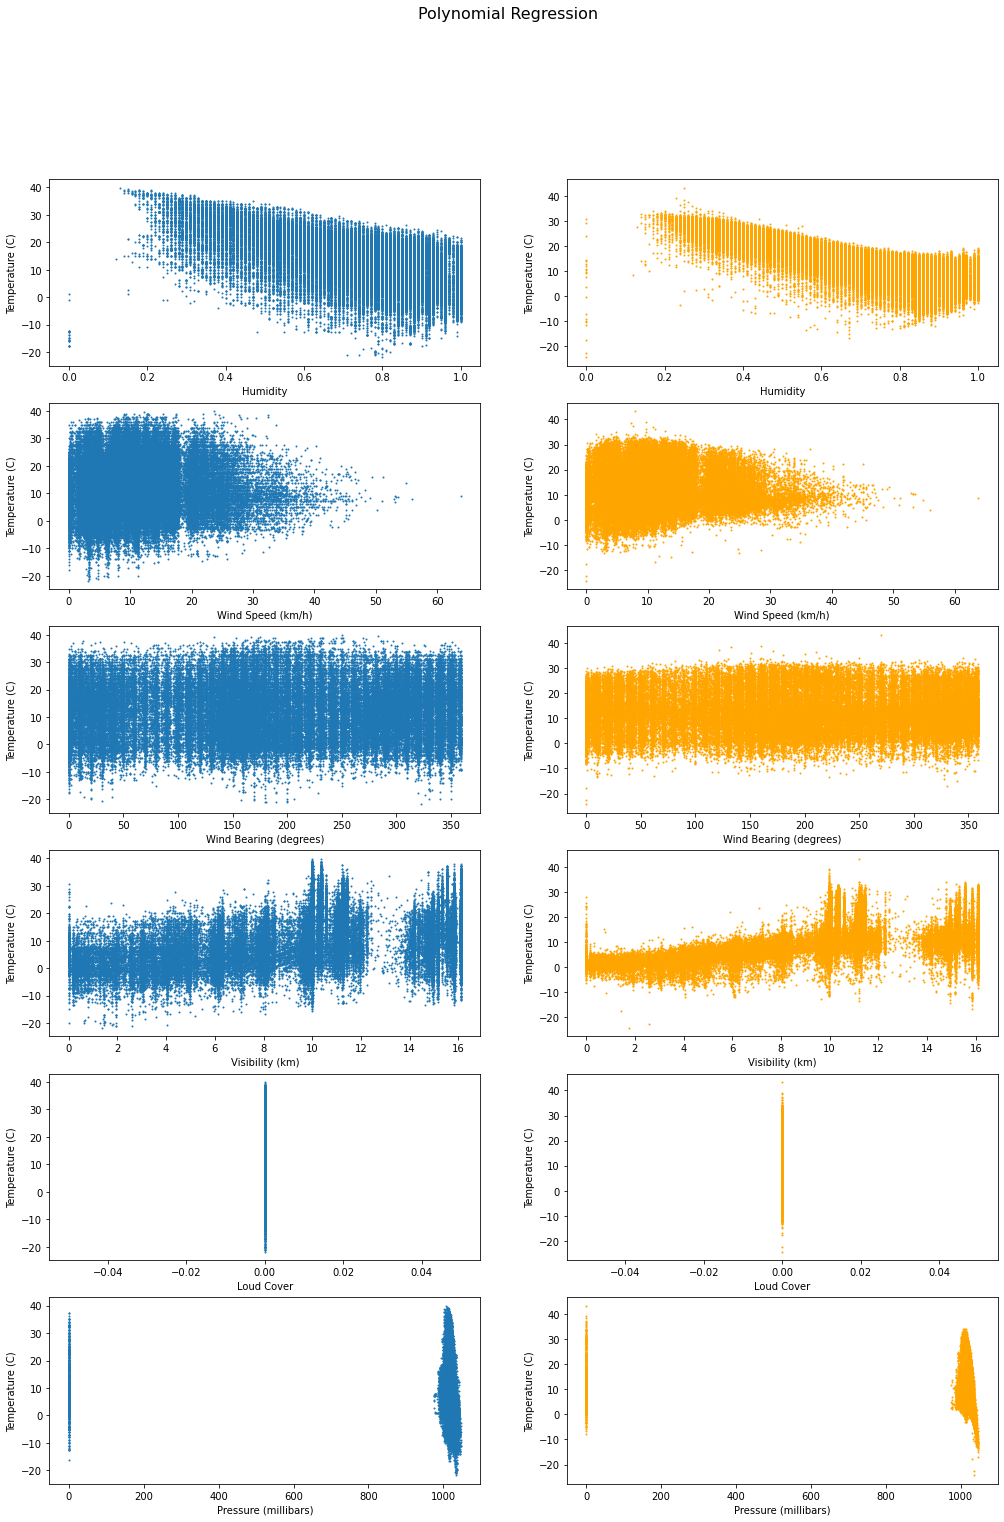

In [27]:
fig, axs = plt.subplots(6, 2)
fig.set_figwidth(17)
fig.set_figheight(24)
fig.suptitle('Polynomial Regression', fontsize=16)
predicted = model.predict(x)

axs[0,0].scatter(df['Humidity'], df['Temperature (C)'], s=1)
axs[0,0].set(xlabel= 'Humidity', ylabel = 'Temperature (C)')
axs[0,1].scatter(df['Humidity'], predicted, color='orange', s=1)
axs[0,1].set(xlabel= 'Humidity', ylabel = 'Temperature (C)')

axs[1,0].scatter(df['Wind Speed (km/h)'], df['Temperature (C)'], s=1)
axs[1,0].set(xlabel= 'Wind Speed (km/h)', ylabel = 'Temperature (C)')
axs[1,1].scatter(df['Wind Speed (km/h)'], predicted, color='orange', s=1)
axs[1,1].set(xlabel= 'Wind Speed (km/h)', ylabel = 'Temperature (C)')

axs[2,0].scatter(df['Wind Bearing (degrees)'], df['Temperature (C)'], s=1)
axs[2,0].set(xlabel= 'Wind Bearing (degrees)', ylabel = 'Temperature (C)')
axs[2,1].scatter(df['Wind Bearing (degrees)'], predicted, color='orange', s=1)
axs[2,1].set(xlabel= 'Wind Bearing (degrees)', ylabel = 'Temperature (C)')

axs[3,0].scatter(df['Visibility (km)'], df['Temperature (C)'], s=1)
axs[3,0].set(xlabel= 'Visibility (km)', ylabel = 'Temperature (C)')
axs[3,1].scatter(df['Visibility (km)'], predicted, color='orange', s=1)
axs[3,1].set(xlabel= 'Visibility (km)', ylabel = 'Temperature (C)')

axs[4,0].scatter(df['Loud Cover'], df['Temperature (C)'], s=1)
axs[4,0].set(xlabel= 'Loud Cover', ylabel = 'Temperature (C)')
axs[4,1].scatter(df['Loud Cover'], predicted, color='orange', s=1)
axs[4,1].set(xlabel= 'Loud Cover', ylabel = 'Temperature (C)')

axs[5,0].scatter(df['Pressure (millibars)'], df['Temperature (C)'], s=1)
axs[5,0].set(xlabel= 'Pressure (millibars)', ylabel = 'Temperature (C)')
axs[5,1].scatter(df['Pressure (millibars)'], predicted, color='orange', s=1)
axs[5,1].set(xlabel= 'Pressure (millibars)', ylabel = 'Temperature (C)')

fig.set_facecolor('white')
plt.show()